In [1]:
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np



In [4]:
import os
from os import environ, path

current_directory = os.getcwd()
print(current_directory) 
df = pd.read_csv(r'C:\Users\Harish Vasanth\Desktop\Machine-learning-projects\DeliveryPredictionModel\data\historical_data.csv')


c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\DeliveryPredictionModel\notebooks


In [5]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_time_taken'] = df['actual_delivery_time']-df['created_at']
df['date'] = pd.to_datetime(df['actual_delivery_time']).dt.date
df['actual_time_taken'] = df['actual_time_taken']/ pd.offsets.Second(1) ## Transforms it into seconds

In [6]:
cleaned  = df[df['actual_time_taken'] <= df.actual_time_taken.quantile(0.9999)] # removing the outliers
cleaned = cleaned.dropna(
    how='any', 
    subset=[
        'actual_time_taken', 
        'market_id', 
        'store_primary_category',
        'total_onshift_dashers',
        'total_busy_dashers',
        'total_outstanding_orders'
    ],
)

<Axes: ylabel='Frequency'>

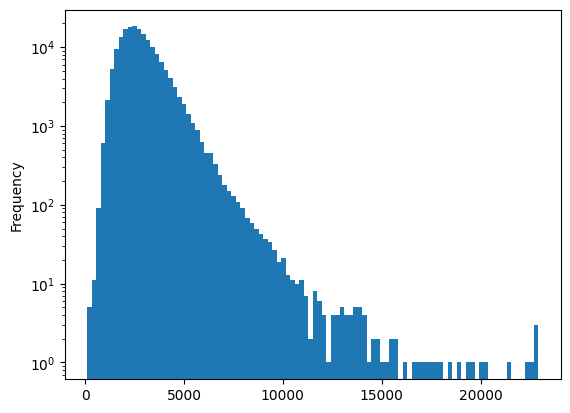

In [7]:
cleaned.actual_time_taken.plot.hist(bins=100, log=True)

In [8]:
integer_columns = [
    'market_id',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
]
for column in integer_columns:
    cleaned[column] = cleaned[column].astype('int32')

In [9]:
numerics = ['total_items',
        'subtotal',
        'num_distinct_items',
        'min_item_price',
        'max_item_price',
        'total_onshift_dashers',
        'total_busy_dashers',   
        'total_outstanding_orders',
        'estimated_order_place_duration',
        'estimated_store_to_consumer_driving_duration']

categorical = ['store_primary_category',
        'market_id',
        'order_protocol',]

calender = [
    'date',
    'created_at',
    'actual_delivery_time',
    'date',
    'actual_time_taken',
]




In [10]:
# Function to clean features

def clean_categorical (df , columns) :
    categorical_features = df[categorical]
    categorical_features = pd.get_dummies(categorical_features, columns = columns)
    categorical_features
    categorical_features.head()
    return categorical_features


def clean_numeric (df , columns):
    numeric_features = df[columns]
    return numeric_features



def clean_calender (df , columns):
    calender_features = df[columns]
    calender_features['day'] = df['created_at'].dt.day
    calender_features['month'] = df['created_at'].dt.month
    calender_features['year'] = df['created_at'].dt.year
    calender_features['hour'] = df['created_at'].dt.hour
    calender_features['hour_sin'] = np.sin(2 * np.pi * calender_features['hour']/24.0)
    calender_features['hour_cos'] = np.cos(2 * np.pi * calender_features['hour']/24.0)
    calender_features['month_sin'] = np.sin(2 * np.pi * calender_features['month']/12.0)
    calender_features['month_cos'] = np.cos(2 * np.pi * calender_features['month']/12.0)
    calender_features['day_sin'] = np.sin(2 * np.pi * calender_features['day']/31.0)
    calender_features['day_sin'] = np.cos(2 * np.pi * calender_features['day']/31.0)
    return calender_features




### Categorical features 

In [11]:
categorical_features = clean_categorical(cleaned,categorical)
categorical_features


,store_primary_category_afghan,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,...,market_id_4,market_id_5,market_id_6,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
197424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
197425,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
197426,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### Calendar features

In [12]:

calender_features = clean_calender(df , calender)
calender_features

C:\Users\Harish Vasanth\AppData\Local\Temp\ipykernel_23120\689213265.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_features['day'] = df['created_at'].dt.day
C:\Users\Harish Vasanth\AppData\Local\Temp\ipykernel_23120\689213265.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calender_features['month'] = df['created_at'].dt.month
C:\Users\Harish Vasanth\AppData\Local\Temp\ipykernel_23120\689213265.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,date,created_at,actual_delivery_time,date,actual_time_taken,day,month,year,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin
0,2015-02-06,2015-02-06 22:24:17,2015-02-06 23:27:16,2015-02-06,3779.0,6,2,2015,22,-0.500000,8.660254e-01,0.866025,0.500000,0.347305
1,2015-02-10,2015-02-10 21:49:25,2015-02-10 22:56:29,2015-02-10,4024.0,10,2,2015,21,-0.707107,7.071068e-01,0.866025,0.500000,-0.440394
2,2015-01-22,2015-01-22 20:39:28,2015-01-22 21:09:09,2015-01-22,1781.0,22,1,2015,20,-0.866025,5.000000e-01,0.500000,0.866025,-0.250653
3,2015-02-03,2015-02-03 21:21:45,2015-02-03 22:13:00,2015-02-03,3075.0,3,2,2015,21,-0.707107,7.071068e-01,0.866025,0.500000,0.820763
4,2015-02-15,2015-02-15 02:40:36,2015-02-15 03:20:26,2015-02-15,2390.0,15,2,2015,2,0.500000,8.660254e-01,0.866025,0.500000,-0.994869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17,2015-02-17 00:19:41,2015-02-17 01:24:48,2015-02-17,3907.0,17,2,2015,0,0.000000,1.000000e+00,0.866025,0.500000,-0.954139
197424,2015-02-13,2015-02-13 00:01:59,2015-02-13 00:58:22,2015-02-13,3383.0,13,2,2015,0,0.000000,1.000000e+00,0.866025,0.500000,-0.874347
197425,2015-01-24,2015-01-24 04:46:08,2015-01-24 05:36:16,2015-01-24,3008.0,24,1,2015,4,0.866025,5.000000e-01,0.500000,0.866025,0.151428
197426,2015-02-01,2015-02-01 18:18:15,2015-02-01 19:23:22,2015-02-01,3907.0,1,2,2015,18,-1.000000,-1.836970e-16,0.866025,0.500000,0.979530


In [13]:
numeric_features = clean_numeric(df,numerics)

In [14]:

cleaned_data = pd.concat([
    numeric_features,
    categorical_features,
    calender_features,
], axis=1)

In [15]:
cleaned_data.dropna()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,actual_time_taken,day,month,year,hour,hour_sin,hour_cos,month_sin,month_cos,day_sin
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,3779.0,6,2,2015,22,-0.500000,8.660254e-01,0.866025,0.500000,0.347305
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,4024.0,10,2,2015,21,-0.707107,7.071068e-01,0.866025,0.500000,-0.440394
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,1586.0,16,2,2015,0,0.000000,1.000000e+00,0.866025,0.500000,-0.994869
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,2273.0,12,2,2015,3,0.707107,7.071068e-01,0.866025,0.500000,-0.758758
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,2988.0,27,1,2015,2,0.500000,8.660254e-01,0.500000,0.866025,0.688967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,3907.0,17,2,2015,0,0.000000,1.000000e+00,0.866025,0.500000,-0.954139
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,3383.0,13,2,2015,0,0.000000,1.000000e+00,0.866025,0.500000,-0.874347
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,3008.0,24,1,2015,4,0.866025,5.000000e-01,0.500000,0.866025,0.151428
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,3907.0,1,2,2015,18,-1.000000,-1.836970e-16,0.866025,0.500000,0.979530


In [17]:
#use this to store cleaned data

DATA_PATH = environ.get('DATA_PATH', 'C:/Users/Harish Vasanth/Desktop/Machine-learning-projects/DeliveryPredictionModel/data/')

cleaned_data.to_csv(path.join(DATA_PATH, 'cleaned_data.csv'))